<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Analysis-of-the-results-on-the-robust-CFLP." data-toc-modified-id="Analysis-of-the-results-on-the-robust-CFLP.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Analysis of the results on the robust CFLP.</a></span><ul class="toc-item"><li><span><a href="#Files-Import-and-Dataframe-Manipulation" data-toc-modified-id="Files-Import-and-Dataframe-Manipulation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Files Import and Dataframe Manipulation</a></span></li><li><span><a href="#Scenario-Curve" data-toc-modified-id="Scenario-Curve-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Scenario Curve</a></span></li><li><span><a href="#Infeasibility-vs-Epsilon-and-L" data-toc-modified-id="Infeasibility-vs-Epsilon-and-L-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Infeasibility vs Epsilon and L</a></span></li><li><span><a href="#Price-of-Robustness" data-toc-modified-id="Price-of-Robustness-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Price of Robustness</a></span></li><li><span><a href="#Counterexample" data-toc-modified-id="Counterexample-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Counterexample</a></span></li><li><span><a href="#Analysis-of-Gamma" data-toc-modified-id="Analysis-of-Gamma-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Analysis of Gamma</a></span></li></ul></li></ul></div>

# Analysis of the results on the robust CFLP.

This code carries out the following steps:
- read the output files of each evaluation
- import them into a pandas dataframe and modify the dataframe to extract the
parameters values
- create charts. The following charts can be created:
>- `-t e` : A chart which explores the effect of epsilon and scenario_epsi onto
       the infeasibility levels (either the counting, the sum, or the max)
>- `-t g` : A plot to explore the effects of the gamma parameter (the percentage
       of customers included in the budget constraint.)

Other parameters of the __command line__ are:
- `-i 'folder'` : The folder containing the files which are the result of the evaluation part
- `-s 'namefile'` : The name of the chart file. By default, the chart is called 'plot.png'. Change this if we want to create multiple charts.


In [1]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use('seaborn')

%matplotlib inline

base = '/home/marco/gdrive/research/rcflp/analysis'


## Files Import and Dataframe Manipulation

Read files from disk. I do not know why, but we have a problem with the file `ms`. It is not reading it automatically. **Note**: Double check that files have extensions.

**NOTE**: This part does not contain the `m` flag (type of objective function) in the current implementation.

In [2]:
name = 'cap94NEW5'
filename = os.path.join(base, name)

listOfFiles = glob.glob(os.path.join(base,name, '*.*'))
i = 0
for file in listOfFiles:
    aux = pd.read_csv(file, header=None, sep=';')
    print("reading file ", file, "with", aux.shape)
    if i == 0:
        df = aux
    else:
        df = df.append(aux,ignore_index=True, sort=False)
    print(df.shape)
   
    i += 1
print("Read ", i, "files")

# now read ms manually (why is it skipping it?)
file = '/home/marco/gdrive/research/rcflp/analysis/cap94NEW5/ms'
aux = pd.read_csv(file, header=None, sep=';')
df = df.append(aux,ignore_index=True, sort=False)
print("Shape of df = ", df.shape)

reading file  /home/marco/gdrive/research/rcflp/analysis/cap94NEW5/budget-0.7 with (31815, 6)
(31815, 6)
reading file  /home/marco/gdrive/research/rcflp/analysis/cap94NEW5/box-0.3 with (909, 6)
(32724, 6)
reading file  /home/marco/gdrive/research/rcflp/analysis/cap94NEW5/budget-0.9 with (40905, 6)
(73629, 6)
reading file  /home/marco/gdrive/research/rcflp/analysis/cap94NEW5/budget-0.6 with (27270, 6)
(100899, 6)
reading file  /home/marco/gdrive/research/rcflp/analysis/cap94NEW5/box-0.1 with (909, 6)
(101808, 6)
reading file  /home/marco/gdrive/research/rcflp/analysis/cap94NEW5/box-0.2 with (909, 6)
(102717, 6)
reading file  /home/marco/gdrive/research/rcflp/analysis/cap94NEW5/box-0.6 with (909, 6)
(103626, 6)
reading file  /home/marco/gdrive/research/rcflp/analysis/cap94NEW5/budget-0.5 with (22725, 6)
(126351, 6)
reading file  /home/marco/gdrive/research/rcflp/analysis/cap94NEW5/box-0.8 with (909, 6)
(127260, 6)
reading file  /home/marco/gdrive/research/rcflp/analysis/cap94NEW5/box-0.4

Add two new columns:
- the `infeasible` column, to flag realizations that lead to infeasiblity. Use a value slighly above zero.
- the `z` column, which provides the total cost.

In [3]:
# give names to columns
df.columns=['scenario', 'solution', 'fixed', 'variable', 'sum', 'max']

# create new columns
df['infeasible'] = np.where(df['max'] > 0.001, 1, 0)
df['z'] = df['fixed'] + df['variable']

In [4]:
df.describe()

,fixed,variable,sum,max,infeasible,z
count,213615.000000,2.136150e+05,213615.000000,213615.000000,213615.000000,2.136150e+05
mean,702659.574468,8.693905e+05,-120.607752,106.579887,0.062776,1.572050e+06
std,98962.136320,8.188767e+04,690.758213,590.736712,0.242561,1.166283e+05
min,500000.000000,4.888660e+05,-17043.200000,0.000000,0.000000,1.030124e+06
25%,625000.000000,8.235820e+05,0.000000,0.000000,0.000000,1.490436e+06
50%,750000.000000,8.637860e+05,0.000000,0.000000,0.000000,1.581897e+06
75%,750000.000000,9.149315e+05,0.000000,0.000000,0.000000,1.652654e+06
max,875000.000000,1.324380e+06,0.000000,12227.100000,1.000000,2.041040e+06


Separate and extract parameters values from the names of the scenario and the support. Note that we also need to change the type of variables to integer or float for the newly created columns.

In [5]:
temp = df['solution'].str.split('-', n = 6, expand = True)
df['support_type'] = temp[1]
df['epsi']  = temp[2]
df['delta'] = temp[3]
df['gamma'] = temp[4]
df['L']     = temp[5]
df["epsi"]  = df.epsi.astype(float)
df["delta"] = df.delta.astype(float)
df["gamma"] = df.gamma.astype(float)
df["L"]     = df.L.astype(int)

temp                = df['scenario'].str.split('_', n = 6, expand = True)
df['scenario_epsi'] = temp[1]
df['scenario_epsi'] = df.scenario_epsi.astype(int)

df.dtypes

scenario          object
solution          object
fixed              int64
variable         float64
sum              float64
max              float64
infeasible         int64
z                float64
support_type      object
epsi             float64
delta            float64
gamma            float64
L                  int64
scenario_epsi      int64
dtype: object

## Scenario Curve

We fix a set of parameters, and we then plot the scenarios (from best to worst) against its objective function value. We repeat it for different values of $\epsilon \in \{0.1, \ldots, 0.9\}$.

In [33]:
support       = 'budget'
scenario_epsi = 900
delta         = 1.1
gamma         = 0.3
L             = 3

ddf = df[ (df['support_type']  == support) & 
          (df['scenario_epsi'] == scenario_epsi) &
          (df['delta'] == delta) &
          (df['gamma'] == gamma) &
          (df['L']     == L)        
        ]

In [34]:
ddf.head()

,scenario,solution,fixed,variable,sum,max,infeasible,z,support_type,epsi,delta,gamma,L,scenario_epsi
28317,../ScenarioGenerator/scenarioscap94/cap94NEW5_...,../rcflp/solutionscap94/cap94NEW5-budget-0.7-1...,625000,1096010.0,0.0000,0.0000,0,1721010.0,budget,0.7,1.1,0.3,3,900
28352,../ScenarioGenerator/scenarioscap94/cap94NEW5_...,../rcflp/solutionscap94/cap94NEW5-budget-0.7-1...,625000,1138690.0,-61.9919,61.9919,1,1763690.0,budget,0.7,1.1,0.3,3,900
28387,../ScenarioGenerator/scenarioscap94/cap94NEW5_...,../rcflp/solutionscap94/cap94NEW5-budget-0.7-1...,625000,1009190.0,0.0000,0.0000,0,1634190.0,budget,0.7,1.1,0.3,3,900
28422,../ScenarioGenerator/scenarioscap94/cap94NEW5_...,../rcflp/solutionscap94/cap94NEW5-budget-0.7-1...,625000,865973.0,0.0000,0.0000,0,1490973.0,budget,0.7,1.1,0.3,3,900
28457,../ScenarioGenerator/scenarioscap94/cap94NEW5_...,../rcflp/solutionscap94/cap94NEW5-budget-0.7-1...,625000,968370.0,-390.3210,390.3210,1,1593370.0,budget,0.7,1.1,0.3,3,900


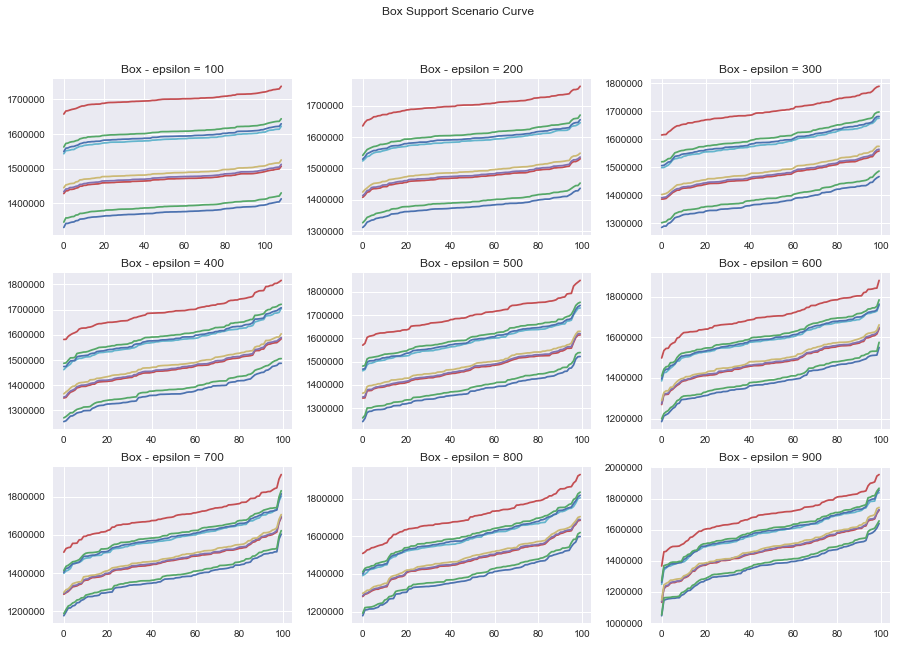

In [91]:
plt.figure(figsize = (15,10))

gs1 = gridspec.GridSpec(3, 3)
gs1.update(wspace=0.25, hspace=0.25)

i = 0
j = 0
count = 0
e_vals = df['scenario_epsi'].unique()
e_vals = np.sort(e_vals)
epsi_vals = ddf['epsi'].unique()
epsi_vals = np.sort(epsi_vals)
ax = []
for e_support in e_vals:
    
    support       = 'box'
    scenario_epsi = e_support

    ddf = df[ (df['support_type']  == support) & 
              (df['scenario_epsi'] == scenario_epsi)
            ]
    
    ax.append(plt.subplot(gs1[i,j]))
    j += 1
    if j % 3 == 0:
        j = 0
        i += 1
    for ee in epsi_vals:
        aux = ddf[ ddf['epsi'] == ee]
        aux = aux.sort_values(by=['z'], axis=0)
        aux['index'] = range(len(aux))
        ax[count].plot(aux['index'], aux['z'] , label=ee)
     
    title = "Box - epsilon = " + str(e_support)
    ax[count].set_title(title);
    count += 1
    
plt.suptitle('Box Support Scenario Curve'); 


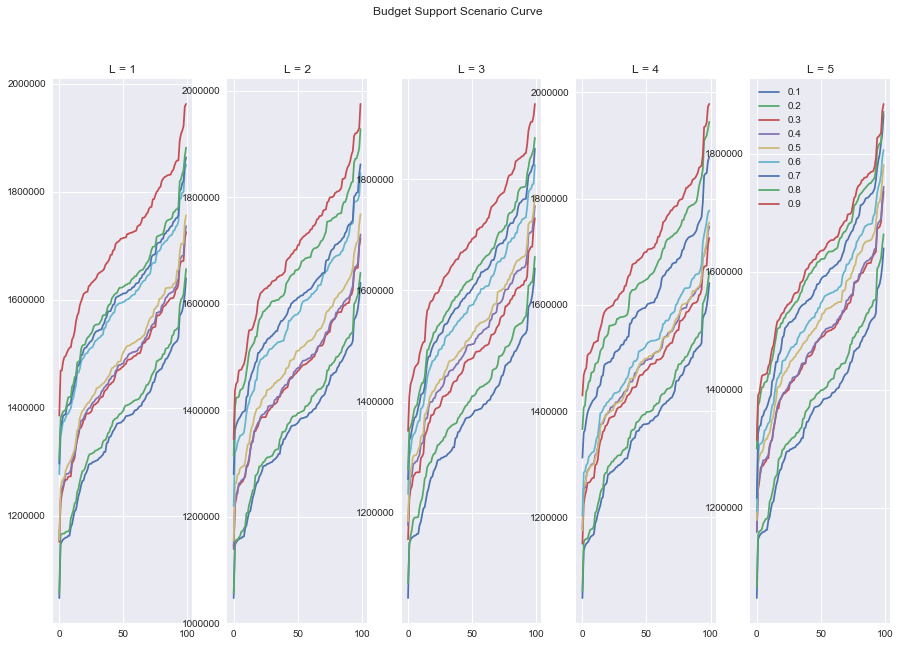

In [92]:
plt.figure(figsize = (15,10))

gs1 = gridspec.GridSpec(1, 5)
gs1.update(wspace=0.25, hspace=0.05)

epsi_vals = ddf['epsi'].unique()
epsi_vals = np.sort(epsi_vals)
ax = []



i = 0
for l in range(1,6):
    
    support       = 'budget'
    scenario_epsi = 900
    delta         = 1.1
    gamma         = 0.3
    L             = l

    ddf = df[ (df['support_type']  == support) & 
              (df['scenario_epsi'] == scenario_epsi) &
              (df['delta'] == delta) &
              (df['gamma'] == gamma) &
              (df['L']     == L)        
            ]
    ax.append(plt.subplot(gs1[0,i]))
    
    for ee in epsi_vals:
        aux = ddf[ ddf['epsi'] == ee]
        aux = aux.sort_values(by=['z'], axis=0)
        aux['index'] = range(len(aux))
        ax[i].plot(aux['index'], aux['z'] , label=ee)
        
    title = "L = " + str(L)
    ax[i].set_title(title);

    i += 1
    
plt.suptitle('Budget Support Scenario Curve'); 
    
plt.legend();
    


## Infeasibility vs Epsilon and L

In [6]:
aa = df[(df['support_type']=='box') & (df['scenario_epsi']==800) & ( (df['epsi']==0.5) | (df['epsi']==0.6) )]
aa.to_csv("temp2.csv")

In [7]:
support       = 'box'
ddf = df[ (df['support_type']  == support)]
ddf['sum'] = ddf['sum']*(-1)
ddf.at[103439, 'infeasible'] = 0
ddf.loc[103439]

#ddf.groupby(by=['epsi', 'scenario_epsi'])['infeasible'].sum().unstack().plot()
#aa = ddf.groupby(by=['epsi', 'scenario_epsi'])['infeasible'].sum()
#aa.to_csv("temp.csv")

/home/marco/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


scenario         ../ScenarioGenerator/scenarioscap94/cap94NEW5_...
solution           ../rcflp/solutionscap94/cap94NEW5-box-0.6-0-0-0
fixed                                                       750000
variable                                                    915831
sum                                                        444.061
max                                                        444.061
infeasible                                                       0
z                                                      1.66583e+06
support_type                                                   box
epsi                                                           0.6
delta                                                            0
gamma                                                            0
L                                                                0
scenario_epsi                                                  800
Name: 103439, dtype: object

In [9]:
support       = 'box'
ddf = df[ (df['support_type']  == support)]
ddf['sum'] = ddf['sum']*(-1)
ddf.to_csv("/home/marco/gdrive/research/rknap/cflp_box.csv")

/home/marco/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


/home/marco/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


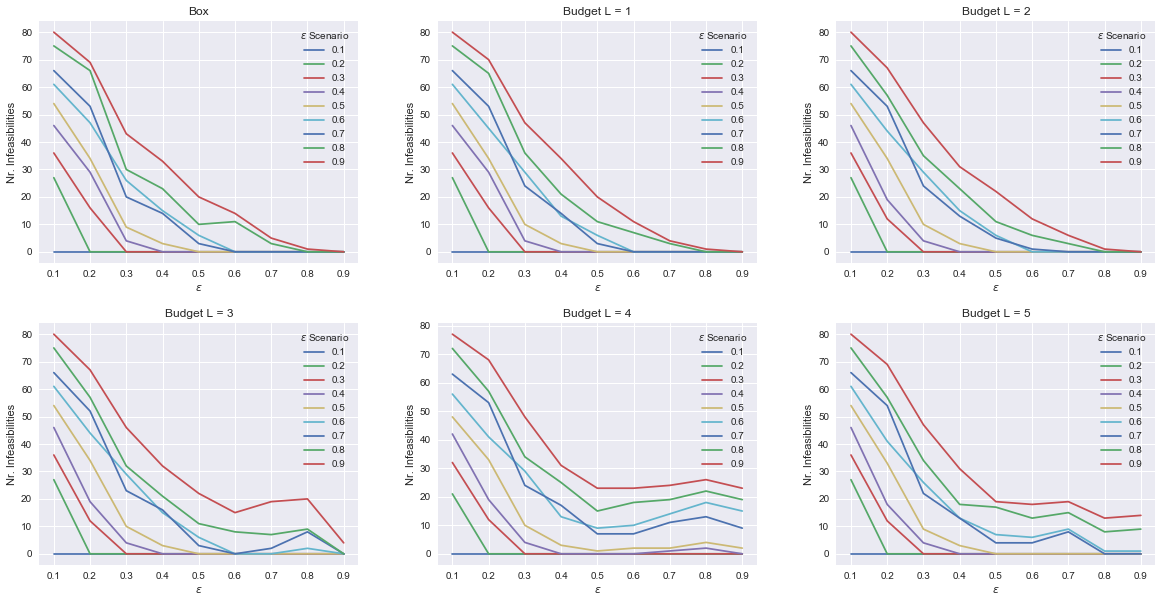

In [8]:
plt.figure(figsize = (20,10))
gs1 = gridspec.GridSpec(2, 3)
gs1.update(wspace=0.25, hspace=0.25)
legend = np.linspace(0.1, 0.9, 9)
ax = []
ax.append(plt.subplot(gs1[0,0]))

support       = 'box'
ddf = df[ (df['support_type']  == support)]
ddf['sum'] = ddf['sum']*(-1)

#ddf.at[103439, 'infeasible'] = 0  # <---- REMOVE THIS


ddf.groupby(by=['epsi', 'scenario_epsi'])['infeasible'].sum().unstack().plot(ax=ax[0])
plt.xlabel(r"$\varepsilon$")
plt.ylabel("Nr. Infeasibilities");
plt.legend(labels=legend, title=r'$\varepsilon$ Scenario')
title = "Box"
plt.title(title);
 


i = 0
j = 1
count = 1

for l in range(1,6):
    ax.append(plt.subplot(gs1[i,j]))
    j += 1
    if j % 3 == 0:
        j = 0
        i += 1

    support       = 'budget'
    delta         = 1.1
    gamma         = 0.3
    L             = l

    ddf = df[ (df['support_type']  == support) & 
              (df['delta'] == delta) &
              (df['gamma'] == gamma) &
              (df['L']     == L)        
            ]
    
    #ddf['sum'] = ddf['sum']*(-1)


    axx = ddf.groupby(by=['epsi', 'scenario_epsi'])['infeasible'].sum().unstack().plot(ax=ax[count])
    title = "Budget L = " + str(L)
   
    axx.set_title(title)
    axx.set_xlabel(r"$\varepsilon$")
    axx.set_ylabel("Nr. Infeasibilities")
    plt.legend(labels=legend, title=r'$\varepsilon$ Scenario');
    count += 1
    
#plt.suptitle('Box and Budget Support Infeasibility Analysis'); 


## Price of Robustness

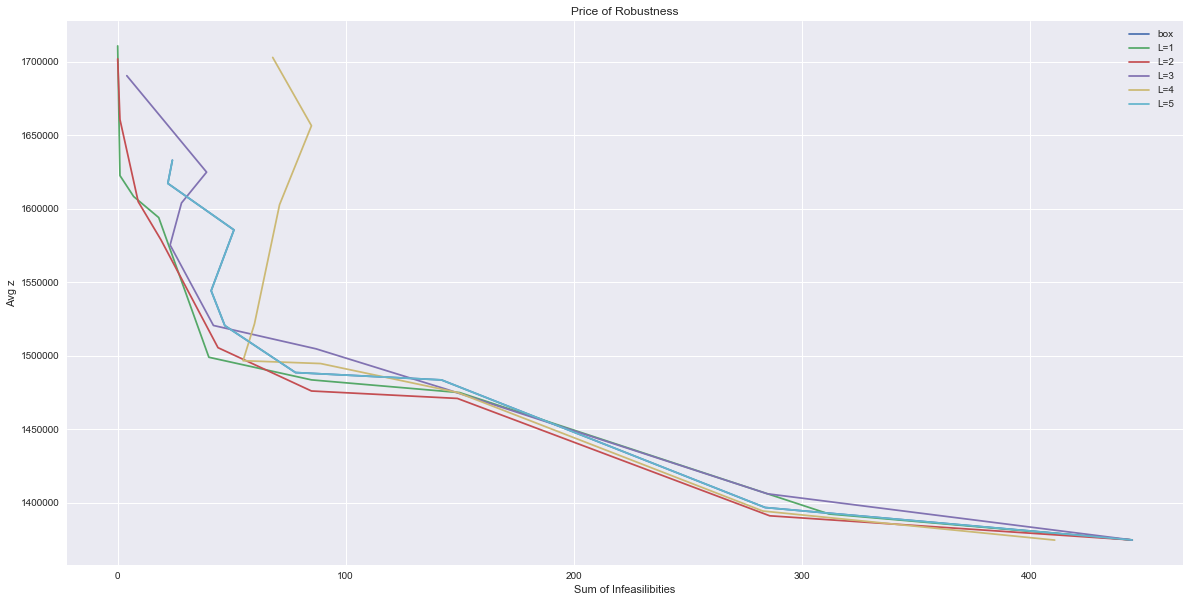

In [94]:
plt.figure(figsize = (20,10))
r = ddf.groupby(by=['epsi'])['infeasible'].sum()
c = ddf.groupby(by=['epsi'])['z'].mean()
plt.plot(r,c, label="box")

for l in range(1,6):
    j += 1
    if j % 3 == 0:
        j = 0
        i += 1

    support       = 'budget'
    delta         = 1.1
    gamma         = 0.3
    L             = l

    ddf = df[ (df['support_type']  == support) & 
              (df['delta'] == delta) &
              (df['gamma'] == gamma) &
              (df['L']     == L)        
            ]
    
    r = ddf.groupby(by=['epsi'])['infeasible'].sum()
    c = ddf.groupby(by=['epsi'])['z'].mean()
    plt.plot(r,c, label="L="+str(L))
    
plt.xlabel("Sum of Infeasilibities")    
plt.ylabel("Avg z")
plt.title("Price of Robustness")
plt.legend();

## Counterexample

We remove the uncertainty from the objective function and we define the costs using the **nominal values**.

In [97]:
name = 'counterExample'
#name = 'G/G900-1'
filename = os.path.join(base, name)

listOfFiles = glob.glob(os.path.join(base,name, '*.*'))
totFiles = len(listOfFiles)
i = 0
for file in listOfFiles:
    aux = pd.read_csv(file, header=None, sep=';')
    if i % 1000 == 0:
        print("[{0:2d}/{1:2d}] '{2}' \t size :: {3}".format(i+1,totFiles, file, aux.shape))
    if i == 0:
        dfE = aux
    else:
        dfE = dfE.append(aux,ignore_index=True, sort=False)
   
    i += 1
print("Read ", i, "files")

[ 1/ 1] '/home/marco/gdrive/research/rcflp/analysis/counterExample/out_CounterExample.csv' 	 size :: (22500, 6)
Read  1 files


In [98]:
dfE.describe()

,2,3,4,5
count,22500.000000,2.250000e+04,22500.000000,22500.000000
mean,701111.111111,8.515293e+05,-387.288436,332.366179
std,94863.930949,1.244990e+05,1273.913653,1066.996526
min,500000.000000,4.915300e+05,-14835.000000,0.000000
25%,625000.000000,7.701920e+05,0.000000,0.000000
50%,750000.000000,8.561980e+05,0.000000,0.000000
75%,750000.000000,9.415770e+05,0.000000,0.000000
max,875000.000000,1.251980e+06,0.000000,10361.200000


In [99]:
# give names to columns
dfE.columns=['scenario', 'solution', 'fixed', 'variable', 'sum', 'max']

# create new columns
dfE['infeasible'] = np.where(dfE['max'] > 0.001, 1, 0)
dfE['z'] = dfE['fixed'] + dfE['variable']

In [100]:
temp = dfE['solution'].str.split('-', n = 7, expand = True)
dfE['support_type'] = temp[2]
dfE['epsi']  = temp[3]
dfE['delta'] = temp[4]
dfE['gamma'] = temp[5]
dfE['L']     = temp[6]
dfE["epsi"]  = dfE.epsi.astype(float)
dfE["delta"] = dfE.delta.astype(float)
dfE["gamma"] = dfE.gamma.astype(float)
dfE["L"]     = dfE.L.astype(int)

temp                = dfE['scenario'].str.split('_', n = 6, expand = True)
dfE['scenario_epsi'] = temp[1]
dfE['scenario_epsi'] = dfE.scenario_epsi.astype(int)

dfE.dtypes

scenario          object
solution          object
fixed              int64
variable         float64
sum              float64
max              float64
infeasible         int64
z                float64
support_type      object
epsi             float64
delta            float64
gamma            float64
L                  int64
scenario_epsi      int64
dtype: object

In the chart below, the behavior of the results obtained using the deterministic objective fuction is marked with "D", while the results of the models with uncertainty in the objective function is marked with "R".

/home/marco/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/marco/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


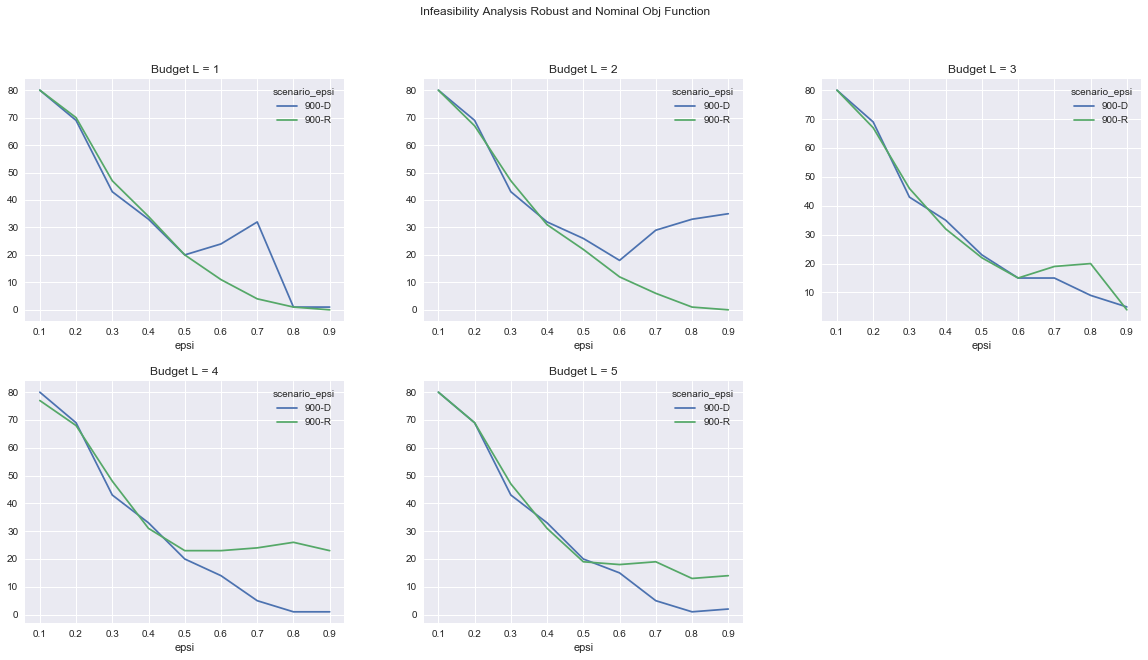

In [101]:
plt.figure(figsize = (20,10))
gs1 = gridspec.GridSpec(2, 3)
gs1.update(wspace=0.25, hspace=0.25)

ax = []

i = 0
j = 0
count = 0

for l in range(1,6):
    ax.append(plt.subplot(gs1[i,j]))
    j += 1
    if j % 3 == 0:
        j = 0
        i += 1

    support       = 'budget'
    delta         = 1.1
    gamma         = 0.3
    L             = l

    ddfE = dfE[ (dfE['support_type']  == support) & 
                (dfE['delta'] == delta) &
                (dfE['gamma'] == gamma) &
                (dfE['L']     == L)        
            ]
    
    ddf =  df[  (df['support_type']  == support) & 
                (df['delta'] == delta) &
                (df['gamma'] == gamma) &
                (df['L']     == L)  &
                (df['scenario_epsi'] == 900)
            ]
    
    #ddf['sum'] = ddf['sum']*(-1)

    ddfE['scenario_epsi'] = ['900-D']*len(ddfE)
    ddf['scenario_epsi'] = ['900-R']*len(ddf)
    
    ddfE.groupby(by=['epsi', 'scenario_epsi'])['infeasible'].sum().unstack().plot( ax=ax[count])
    ddf.groupby(by=['epsi', 'scenario_epsi'])['infeasible'].sum().unstack().plot(ax=ax[count])

    title = "Budget L = " + str(L)
    plt.title(title);
    count += 1
    
plt.suptitle('Infeasibility Analysis Robust and Nominal Obj Function'); 


## Analysis of Gamma

In [75]:
name = 'G/outputGstudy'
#name = 'G/G900-1'
filename = os.path.join(base, name)

listOfFiles = glob.glob(os.path.join(base,name, '*.*'))
totFiles = len(listOfFiles)
i = 0
for file in listOfFiles:
    aux = pd.read_csv(file, header=None, sep=';')
    if i % 1000 == 0:
        print("[{0:2d}/{1:2d}] '{2}' \t size :: {3}".format(i+1,totFiles, file, aux.shape))
    if i == 0:
        dfE = aux
    else:
        dfE = dfE.append(aux,ignore_index=True, sort=False)
   
    i += 1
print("Read ", i, "files")

[ 1/64539] '/home/marco/gdrive/research/rcflp/analysis/G/outputGstudy/out-cap94NEW5_300_354.box-cap94NEW5-0-budget-0.7-1.4-0.5-1.txt' 	 size :: (1, 6)
[1001/64539] '/home/marco/gdrive/research/rcflp/analysis/G/outputGstudy/out-cap94NEW5_100_287.box-cap94NEW5-0-budget-0.4-1.3-0.5-1.txt' 	 size :: (1, 6)
[2001/64539] '/home/marco/gdrive/research/rcflp/analysis/G/outputGstudy/out-cap94NEW5_200_313.box-cap94NEW5-0-budget-0.5-1.1-0.4-1.txt' 	 size :: (1, 6)
[3001/64539] '/home/marco/gdrive/research/rcflp/analysis/G/outputGstudy/out-cap94NEW5_500_302.box-cap94NEW5-0-budget-0.8-1.5-0.5-1.txt' 	 size :: (1, 6)
[4001/64539] '/home/marco/gdrive/research/rcflp/analysis/G/outputGstudy/out-cap94NEW5_100_376.box-cap94NEW5-0-budget-0.8-1.1-0.2-1.txt' 	 size :: (1, 6)
[5001/64539] '/home/marco/gdrive/research/rcflp/analysis/G/outputGstudy/out-cap94NEW5_400_316.box-cap94NEW5-0-budget-0.4-1.1-0.5-1.txt' 	 size :: (1, 6)
[6001/64539] '/home/marco/gdrive/research/rcflp/analysis/G/outputGstudy/out-cap94NEW

[54001/64539] '/home/marco/gdrive/research/rcflp/analysis/G/outputGstudy/out-cap94NEW5_600_334.box-cap94NEW5-0-budget-0.9-1.1-0.1-1.txt' 	 size :: (1, 6)
[55001/64539] '/home/marco/gdrive/research/rcflp/analysis/G/outputGstudy/out-cap94NEW5_300_341.box-cap94NEW5-0-budget-0.8-1.2-0.5-1.txt' 	 size :: (1, 6)
[56001/64539] '/home/marco/gdrive/research/rcflp/analysis/G/outputGstudy/out-cap94NEW5_200_278.box-cap94NEW5-0-budget-0.9-1.5-0.5-1.txt' 	 size :: (1, 6)
[57001/64539] '/home/marco/gdrive/research/rcflp/analysis/G/outputGstudy/out-cap94NEW5_400_365.box-cap94NEW5-0-budget-0.9-1.3-0.5-1.txt' 	 size :: (1, 6)
[58001/64539] '/home/marco/gdrive/research/rcflp/analysis/G/outputGstudy/out-cap94NEW5_700_343.box-cap94NEW5-0-budget-0.8-1.2-0.5-1.txt' 	 size :: (1, 6)
[59001/64539] '/home/marco/gdrive/research/rcflp/analysis/G/outputGstudy/out-cap94NEW5_400_284.box-cap94NEW5-0-budget-0.4-1.1-0.5-1.txt' 	 size :: (1, 6)
[60001/64539] '/home/marco/gdrive/research/rcflp/analysis/G/outputGstudy/out

In [76]:
# give names to columns
dfE.columns=['scenario', 'solution', 'fixed', 'variable', 'sum', 'max']

# create new columns
dfE['infeasible'] = np.where(dfE['max'] > 0.001, 1, 0)
dfE['z'] = dfE['fixed'] + dfE['variable']

In [77]:
temp = dfE['solution'].str.split('-', n = 7, expand = True)
dfE['support_type'] = temp[2]
dfE['epsi']  = temp[3]
dfE['delta'] = temp[4]
dfE['gamma'] = temp[5]
dfE['L']     = temp[6]
dfE["epsi"]  = dfE.epsi.astype(float)
dfE["delta"] = dfE.delta.astype(float)
dfE["gamma"] = dfE.gamma.astype(float)
dfE["L"]     = dfE.L.astype(int)

temp                = dfE['scenario'].str.split('_', n = 6, expand = True)
dfE['scenario_epsi'] = temp[1]
dfE['scenario_epsi'] = dfE.scenario_epsi.astype(int)

dfE.dtypes

scenario          object
solution          object
fixed              int64
variable         float64
sum              float64
max              float64
infeasible         int64
z                float64
support_type      object
epsi             float64
delta            float64
gamma            float64
L                  int64
scenario_epsi      int64
dtype: object

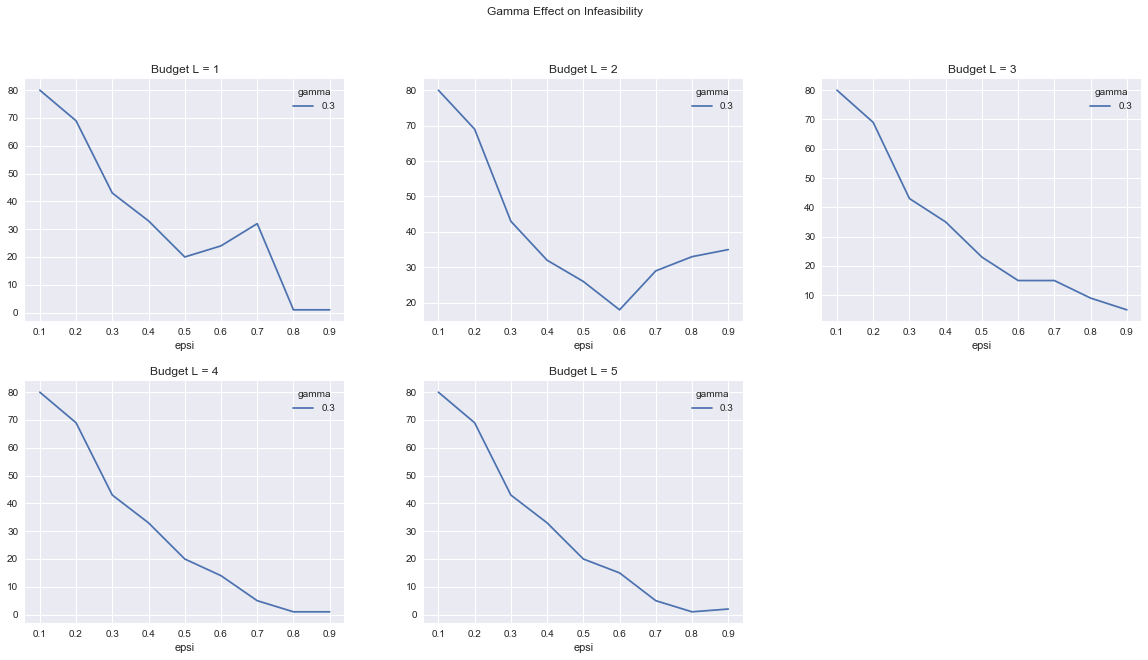

In [104]:
L_vals = dfE['L'].unique()
L_vals = np.sort(L_vals)

plt.figure(figsize = (20,10))
gs1 = gridspec.GridSpec(2, 3)
gs1.update(wspace=0.25, hspace=0.25)

ax = []

i = 0
j = 0
count = 0

for l in L_vals:
    ax.append(plt.subplot(gs1[i,j]))
    j += 1
    if j % 3 == 0:
        j = 0
        i += 1

    support       = 'budget'
    delta         = 1.1
    L             = l

    ddfE = dfE[ (dfE['support_type']  == support) & 
                (dfE['delta'] == delta) &
                (dfE['L']     == L)        
            ]
    

   
    ddfE.groupby(by=['epsi', 'gamma'])['infeasible'].sum().unstack().plot( ax=ax[count])

    title = "Budget L = " + str(L)
    plt.title(title);
    count += 1
    
plt.suptitle('Gamma Effect on Infeasibility'); 